In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [59]:
 fraud = pd.read_csv('E:/DataScience/Assignments/Decision Tree/Fraud_check.csv')

In [60]:
fraud.head()

,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Undergrad
0,Single,68833,50047,10,YES,NO
1,Divorced,33700,134075,18,YES,YES
2,Married,36925,160205,30,YES,NO
3,Single,50190,193264,15,YES,YES
4,Married,81002,27533,28,NO,NO


In [61]:
fraud['Urban'] = fraud['Urban'].replace(['YES'], '1')

In [62]:
fraud['Urban'] = fraud['Urban'].replace(['NO'], '0')

In [63]:
fraud['Undergrad'] = fraud['Undergrad'].replace(['YES'], '1')

In [64]:
fraud['Undergrad'] = fraud['Undergrad'].replace(['NO'], '0')

In [65]:
fraud['TaxableIncome'] = pd.cut(fraud['TaxableIncome'],bins=[30000,60000,100000],labels=['Risky','Good'])

In [66]:
dummies = pd.get_dummies(fraud['MaritalStatus'])

In [67]:
fraud = fraud.drop(columns=['MaritalStatus'])

In [68]:
fraud = pd.concat([fraud,dummies], axis=1)

In [69]:
fraud.head()

,TaxableIncome,CityPopulation,WorkExperience,Urban,Undergrad,Divorced,Married,Single
0,Good,50047,10,1,0,0,0,1
1,Risky,134075,18,1,1,1,0,0
2,Risky,160205,30,1,0,0,1,0
3,Risky,193264,15,1,1,0,0,1
4,Good,27533,28,0,0,0,1,0


In [70]:
fraud.isna().sum()

TaxableIncome     124
CityPopulation      0
WorkExperience      0
Urban               0
Undergrad           0
Divorced            0
Married             0
Single              0
dtype: int64

In [71]:
fraud = fraud.dropna()

In [72]:
label_encoder = preprocessing.LabelEncoder()
fraud['TaxableIncome']= label_encoder.fit_transform(fraud['TaxableIncome']) 

In [73]:
x=fraud.iloc[:,1:5]
y=fraud['TaxableIncome']

In [74]:
x

,CityPopulation,WorkExperience,Urban,Undergrad
0,50047,10,1,0
1,134075,18,1,1
2,160205,30,1,0
3,193264,15,1,1
4,27533,28,0,0
...,...,...,...,...
595,39492,7,1,1
596,55369,2,1,1
597,154058,0,1,0
598,180083,17,0,1


In [75]:
y

0      0
1      1
2      1
3      1
4      0
      ..
595    0
596    0
597    1
598    0
599    0
Name: TaxableIncome, Length: 476, dtype: int32

In [76]:
fraud['TaxableIncome'].unique()

array([0, 1])

In [77]:
fraud.TaxableIncome.value_counts()

0    266
1    210
Name: TaxableIncome, dtype: int64

In [78]:
colnames = list(fraud.columns)
colnames

['TaxableIncome',
 'CityPopulation',
 'WorkExperience',
 'Urban',
 'Undergrad',
 'Divorced',
 'Married',
 'Single']

In [79]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=30)

In [80]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

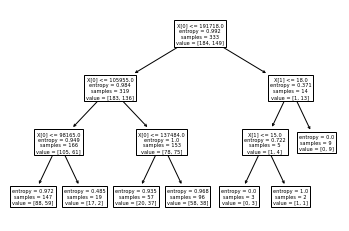

In [81]:
tree.plot_tree(model);

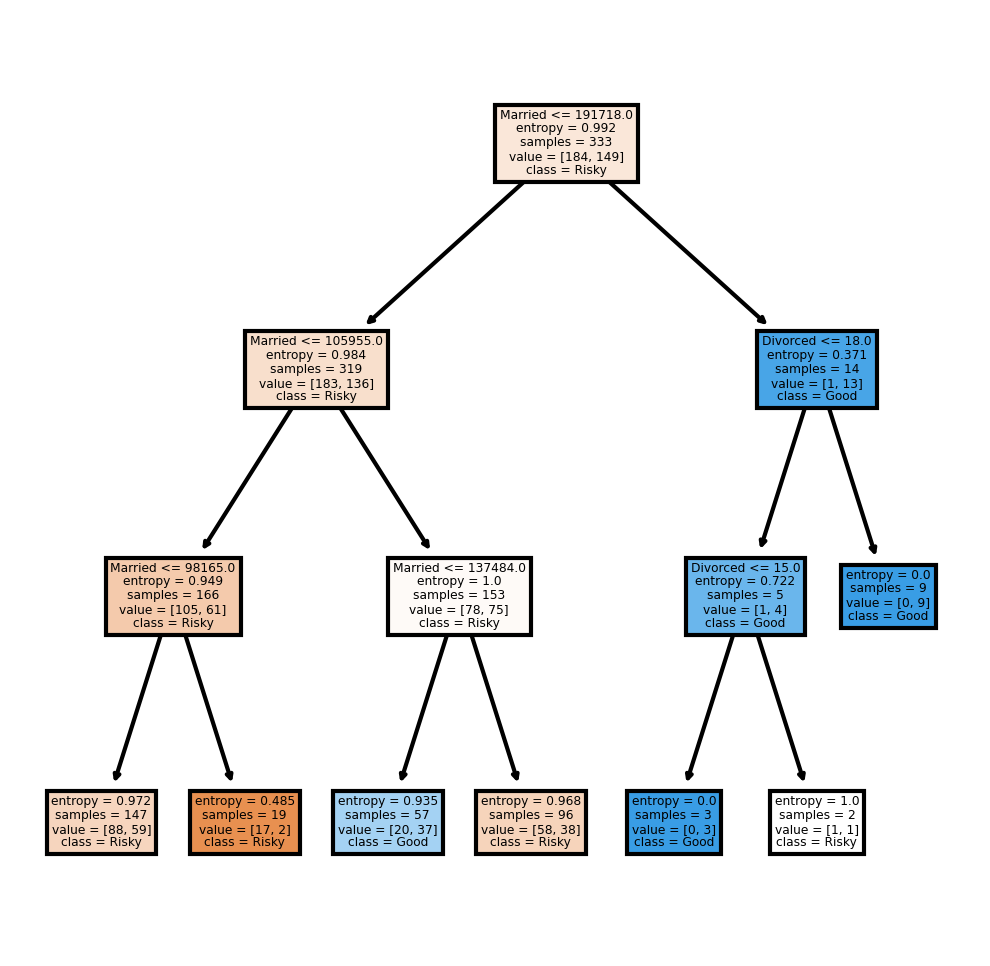

In [82]:
fn=['Married','Divorced','Single','CityPopulation','WorkExperience','Urban','Undergrad',]
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [83]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    108
1     35
dtype: int64

In [84]:
preds

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [85]:
pd.crosstab(y_test,preds)

col_0,0,1
TaxableIncome,,
0,66,16
1,42,19


In [86]:
np.mean(preds==y_test)

0.5944055944055944

In [87]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [88]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [89]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5944055944055944

In [90]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
array = fraud.values
X = array[:,1:5]
y = array[:,0]

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=1)

In [93]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [94]:
model.score(X_test,y_test)

-0.9910885899004018